In [1]:
import os
import numpy as np
from tqdm.auto import trange

In [2]:
from astropy.cosmology import Planck13

In [3]:
from provabgs import infer as Infer
from provabgs import models as Models

In [12]:
import matplotlib.pyplot as plt

In [4]:
priors =  Infer.load_priors([
    Infer.FlatDirichletPrior(4, label='sed'),       # flat dirichilet priors
    Infer.UniformPrior(0., 1., label='sed'), # burst fraction
    Infer.UniformPrior(1.e-2, 13.27),                 # uniform priors on tburst from 10Myr to 13.27 Gyr
    Infer.LogUniformPrior(4.5e-5, 4.5e-2, label='sed'), # log uniform priors on ZH coeff
    Infer.LogUniformPrior(4.5e-5, 4.5e-2, label='sed'), # log uniform priors on ZH coeff
    Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust1
    Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust2
    Infer.UniformPrior(-3., 1., label='sed')     # uniform priors on dust_index
    ])

In [5]:
nsamp = 100
thetas = np.array([priors.transform(priors.sample()) for i in range(nsamp)])
zreds = np.random.uniform(0., 0.6, size=nsamp)
tages = Planck13.age(zreds).value

In [6]:
m_fsps = Models.NMF(burst=True, emulator=False)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [7]:
m_fsps._ssp_initiate()

In [8]:
tts = np.concatenate([np.zeros((thetas.shape[0],1)), thetas], axis=1)
msurv_emu = m_fsps._surviving_mass(tts, tages, emulator=True)

msurv = []
for _tt, tage in zip(tts, tages):
    msurv.append(m_fsps._surviving_mass(_tt, tage, emulator=False))

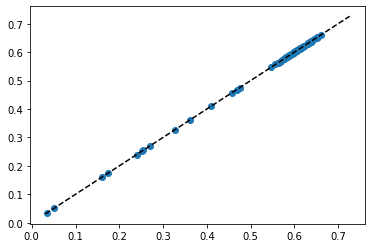

In [16]:
plt.scatter(np.concatenate(msurv), msurv_emu)
plt.plot([0.9*msurv_emu.min(), 1.1*msurv_emu.max()], [0.9*msurv_emu.min(), 1.1*msurv_emu.max()], c='k', ls='--')

In [9]:
%timeit m_fsps._surviving_mass(_tt, tage, emulator=True)

724 µs ± 4.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%timeit m_fsps._surviving_mass(_tt, tage, emulator=False)

266 ms ± 4.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
